## Question - 1

- Is it OK to initialize all the weights to the same value as long as that value is selected randomly using He initialization ?

> No, even if using He Initialisation for creating kernels with the same value, the kernel will fail to break the symmetry problem.
> This causes the deep neural network to learn patterns much slower and is prone to exploding or vanishing.

## Question - 2

- Is it OK to initialize the bias terms to 0?

> Yes, it is okay to initialise all the bias terms to 0 since the contribution made through bias vector initialisation is almost indifferent.

## Question - 3

- Name three advantages of the SELU activation function over ReLU ?

> - The Selu activation function is much faster than Relu for standardised input information.
> - The Selu activation function ensures that the exploding and vanishing gradients problem is always at bay while training the neural network.
> - The Selu activation function makes the Neural Network self normalising ensuring all the parameters learnt by the model during training are robust for all features and instances of the training and validation sets.

## Question - 4

- In which cases would you want to use each of the following activation functions: SELU, leaky ReLU (and its variants), ReLU, tanh, logistic, and softmax ?

> - Selu: When the input data is standardised and the neural network contains many hidden layers
> - Leaky Relu (and its variants): When the dataset is large but slight addition in computation time can be traded for a significant improvement in performance.
> - Relu: When the usage of a mostly non saturating activation function doesnt hurt the performance of the model.
> - Tanh: When the output layer of a model is within the range of -1 to 1.
> - Logistic: When the output layer of the model is binary.

## Question - 5

- What may happen if you set the momentum hyperparameter too close to 1 (e.g., 0.99999) when using an SGD optimizer?

> - When the momentum hyperparameter is set much closer to 1 such as 0.9999999 ... the Gradient descent algorithm tends to pickup speed.
> - However since the Gradient Descent algorithm isn't the most efficient it more often then not tends to overshoot the global optimum.
> - It continues to oscillate around the global optimum until either reaching it precisely or ending up overshooting.
> - Thus all together the algorithm takes much longer to converge with a larger value of momentum than a small value.

## Question - 6

- Name three ways you can produce a sparse model.

> - Train a model as usual and then push all the tiny weights to 0.
> - Apply l1 regularisation to zero out parameters which are not being used in learning patterns during training itself.
> - Utilise the TensorFlow model development toolkit.

## Question - 7

- Does dropout slow down training? Does it slow down inference (i.e., making predictions on new instances)? What about MC Dropout?

> - Yes, dropout does slowdown training as the model takes longer to regularise all its parameters and approach convergence.
> - When using Monte Carlo Simulations the model utilises dropout layers while making inferences. Thus the model is much slower not just while training but while making predictions.

## Question - 8a.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-07-06 05:52:50.270035: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-06 05:52:50.270162: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-06 05:52:50.418698: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Loading the dataset
cifar10 = tf.keras.datasets.cifar10.load_data()
print(type(cifar10))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
<class 'tuple'>


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10
print(type(X_train))

<class 'numpy.ndarray'>


In [4]:
X_train, y_train, X_valid, y_valid = X_train[:-7000], y_train[:-7000], X_train[-7000:], y_train[-7000:]
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(43000, 32, 32, 3)
(43000, 1)
(7000, 32, 32, 3)
(7000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
cifar_class_names = [
    'airplane', 
    'automobile', 
    'bird', 
    'cat', 
    'deer', 
    'dog', 
    'frog', 
    'horse', 
    'ship', 
    'truck'
]

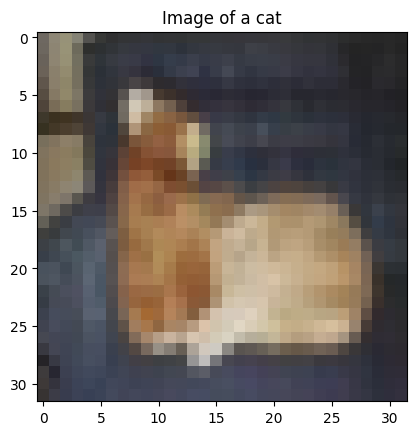

In [6]:
idx = 17

plt.title(f"Image of a {cifar_class_names[y_train[idx][0]]}")
plt.imshow(X_train[idx], cmap="binary")

- Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function.

In [7]:
tf.keras.backend.clear_session()

# Building the 20 layer ELU Model
elu_model = tf.keras.models.Sequential()

# Input Layer
elu_model.add(
    tf.keras.layers.Flatten(input_shape=[32, 32, 3])
)

# Hidden Layers
for layer in range(20):
    elu_model.add(
        tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal")
    )

# Output Layer
elu_model.add(
    tf.keras.layers.Dense(10, activation="softmax")
)

elu_model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

## Question - 8b.

- Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_ data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you’ll need a softmax out‐ put layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.

In [8]:
# Exponential Learning Rate Scheduler
exponential_lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_rate=0.1,
    decay_steps=10e2,
    staircase=False
)

# Earlystopping Callback
earlystop_cb = tf.keras.callbacks.EarlyStopping(
    patience=5, restore_best_weights=True, monitor="val_loss", min_delta=1e-3
)

# Compiling the Model
elu_model.compile(
    optimizer=tf.keras.optimizers.Nadam(learning_rate=exponential_lr_schedule),
    metrics=["accuracy"],
    loss="sparse_categorical_crossentropy"
)

# Training
elu_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, callbacks=[earlystop_cb]
)

Epoch 1/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.1915 - loss: 9.7499 - val_accuracy: 0.3026 - val_loss: 1.9196
Epoch 2/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3133 - loss: 1.8888 - val_accuracy: 0.3213 - val_loss: 1.8860
Epoch 3/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3251 - loss: 1.8724 - val_accuracy: 0.3217 - val_loss: 1.8823
Epoch 4/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3275 - loss: 1.8647 - val_accuracy: 0.3214 - val_loss: 1.8824
Epoch 5/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3283 - loss: 1.8622 - val_accuracy: 0.3216 - val_loss: 1.8824
Epoch 6/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3284 - loss: 1.8661 - val_accuracy: 0.3216 - val_loss: 1.8824
Epoch 7/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3265 - loss: 1.8682 - val_accuracy: 0.3216 - val_loss: 1.8824
Epoch 8/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3279 - loss: 1

## Question - 8c.

- Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before ? Does it produce a better model? How does it affect training speed ?

In [9]:
# Backend Reset
tf.keras.backend.clear_session()

# Initialisation
batchnorm_model = tf.keras.models.Sequential()

# Input Layer
batchnorm_model.add(
    tf.keras.layers.Flatten(input_shape=[32, 32, 3])
)

# Hidden Layers
for layer in range(20):
    
    # Adding a BatchNormalisation Layer for every 5 layers
    if layer % 5 == 0:
        batchnorm_model.add(
            tf.keras.layers.BatchNormalization()
        )
        
    # Adding Hidden Layers
    batchnorm_model.add(
        tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal")
    )
    
# Output Layer
batchnorm_model.add(
    tf.keras.layers.Dense(10, activation="softmax")
)

batchnorm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3072)           │        12,288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,10

 Total params: 513,698 (1.96 MB)

 Trainable params: 506,954 (1.93 MB)

 Non-trainable params: 6,744 (26.34 KB)

In [10]:
# Exponential Learning Rate Scheduler
exponential_lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_rate=0.1,
    decay_steps=10e2,
    staircase=False
)

# EarlyStopping Callback
earlystop_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True, min_delta=1e-3, mode="min"
)

# Compiling the Model
batchnorm_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Nadam(learning_rate=exponential_lr_schedule)
)

# Training
batchnorm_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, callbacks=[earlystop_cb]
)

Epoch 1/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.2516 - loss: 2.1109 - val_accuracy: 0.3716 - val_loss: 1.7352
Epoch 2/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3684 - loss: 1.7410 - val_accuracy: 0.3834 - val_loss: 1.7018
Epoch 3/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3764 - loss: 1.7154 - val_accuracy: 0.3841 - val_loss: 1.7007
Epoch 4/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3765 - loss: 1.7194 - val_accuracy: 0.3859 - val_loss: 1.7010
Epoch 5/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3736 - loss: 1.7189 - val_accuracy: 0.3856 - val_loss: 1.7008
Epoch 6/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3801 - loss: 1.7130 - val_accuracy: 0.3809 - val_loss: 1.7013
Epoch 7/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3786 - loss: 1.7099 - val_accuracy: 0.3856 - val_loss: 1.7010
Epoch 8/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3795 -

## Question - 8d.

- Try replacing Batch Normalization with SELU, and make the necessary adjust‐ ements to ensure the network self-normalizes (i.e., standardize the input fea‐ tures, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).

In [11]:
# Clearing the Backend Vars
tf.keras.backend.clear_session()

# Initialisation
selu_model = tf.keras.models.Sequential()

# Input Layers
selu_model.add(
    tf.keras.layers.Flatten(input_shape=[32, 32, 3])
)

# Hidden Layers
for layer in range(20):
    selu_model.add(
        tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal")
    )
    
# Output Layer
selu_model.add(
    tf.keras.layers.Dense(10, activation="softmax")
)

selu_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()
print("Mean: ", X_train_mean)
print("Standard Deviation: ", X_train_std)

Mean:  120.69890554596657
Standard Deviation:  64.1844451920407


In [13]:
# Standardisation of the Input
for dataset in [X_train, X_valid, X_test]:
    dataset = (dataset - X_train_mean) / X_train_std

In [14]:
# Exponential Learning Rate Schedule
exponential_lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_rate=0.1,
    decay_steps=10e2,
    staircase=False
)

# Callback
earlystop_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", restore_best_weights=True, patience=5, min_delta=1e-3, mode="min"
)

# Compilation
selu_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Nadam(learning_rate=exponential_lr_schedule)
)

# Training
selu_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, callbacks=[earlystop_cb]
)

Epoch 1/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.2120 - loss: 2.1784 - val_accuracy: 0.3256 - val_loss: 1.8346
Epoch 2/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3459 - loss: 1.8003 - val_accuracy: 0.3380 - val_loss: 1.8076
Epoch 3/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3502 - loss: 1.7854 - val_accuracy: 0.3404 - val_loss: 1.8052
Epoch 4/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3515 - loss: 1.7757 - val_accuracy: 0.3403 - val_loss: 1.8051
Epoch 5/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3512 - loss: 1.7743 - val_accuracy: 0.3403 - val_loss: 1.8051
Epoch 6/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3519 - loss: 1.7771 - val_accuracy: 0.3403 - val_loss: 1.8051
Epoch 7/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3567 - loss: 1.7742 - val_accuracy: 0.3403 - val_loss: 1.8051
Epoch 8/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3556 - loss: 1

## Question - 8e.

- Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.

In [15]:
# Backend Vars cleared
tf.keras.backend.clear_session()

# Initialisation
alpha_dropout_model = tf.keras.models.Sequential()

# Input Layer
alpha_dropout_model.add(
    tf.keras.layers.Flatten(input_shape=[32, 32, 3])
)

# Hidden Layers
for layer in range(20):
    if (layer % 9 == 0) and (layer != 0):
        alpha_dropout_model.add(
            tf.keras.layers.Dropout(rate=0.1)
        )
    alpha_dropout_model.add(
        tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal")
    )
    
# Dropout Layer
# alpha_dropout_model.add(
#     tf.keras.layers.Dropout(rate=0.1)
# )

# Output Layer
alpha_dropout_model.add(
    tf.keras.layers.Dense(10, activation="softmax")
)

alpha_dropout_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Exponential Learning Rate Schedule
exponential_lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_rate=0.1,
    decay_steps=10e2,
    staircase=False
)

# Callback
earlystop_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", restore_best_weights=True, patience=5, min_delta=1e-3, mode="min"
)

# Compilation
alpha_dropout_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Nadam(learning_rate=exponential_lr_schedule)
)

# Training
alpha_dropout_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, callbacks=[earlystop_cb]
)

Epoch 1/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.1289 - loss: 5.2225 - val_accuracy: 0.2339 - val_loss: 2.0281
Epoch 2/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2147 - loss: 2.0746 - val_accuracy: 0.2500 - val_loss: 1.9958
Epoch 3/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2230 - loss: 2.0559 - val_accuracy: 0.2529 - val_loss: 1.9918
Epoch 4/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2284 - loss: 2.0481 - val_accuracy: 0.2530 - val_loss: 1.9914
Epoch 5/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2325 - loss: 2.0452 - val_accuracy: 0.2530 - val_loss: 1.9914
Epoch 6/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2264 - loss: 2.0426 - val_accuracy: 0.2530 - val_loss: 1.9914
Epoch 7/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2255 - loss: 2.0495 - val_accuracy: 0.2530 - val_loss: 1.9914
Epoch 8/30
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2300 - loss: 2

**Applying Monte Carlo Dropout**

In [17]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [18]:
# Backend clearing
tf.keras.backend.clear_session()

# Building the model
mc_dropout_model = tf.keras.models.Sequential([
    (
        MCDropout(layer.rate) if isinstance(layer, tf.keras.layers.Dropout) else layer
    ) 
    for layer in alpha_dropout_model.layers
])

mc_dropout_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout (MCDropout)          │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_1 (MCDropout)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# MC Dropout Utility Functions
def y_probas_from_samples(mc_model, X, n_samples=10):
    y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    y_probas = y_probas_from_samples(mc_model, X, n_samples)
    return y_probas.argmax(axis=1)

In [20]:
y_pred = mc_dropout_predict_classes(mc_dropout_model, X_valid)
accuracy = (y_pred == y_valid[:, 0]).mean()
print(accuracy)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0.25285714285714284


In [21]:
y_pred = mc_dropout_predict_classes(mc_dropout_model, X_test)
accuracy = (y_pred == y_test[:, 0]).mean()
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0.2528
